In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Training Models

While it is very easy to use machine learning models as a black box, understanding how a model works can allow one to better choose an algorithm and design better hyperparameters.

## The Linear Regression Model

### Intro

The linear regression model is written as follows

$$\hat{y} = h_\theta (\mathbf{x}) = \theta_T \cdot \mathbf{x} $$

where $\hat{y}$ is an estimator of some outcome, $\mathbf{x}$ is the instances **feature vector** and $\theta$ is the models **parameter vector**. For example $\hat{y}$ might be the weight of a person on $\mathbf{x}$ might be $x_1=\text{height}$ and $x_2=\text{age}$. Note that $x_0=1$ (must add this in to estimate constant term).

$\theta$ is obtained by looking at data. A good model, for example, should have $\hat{y}$ and $\theta_T \cdot \mathbf{x}$ as close together as possible for all the data provided. One measurement for *closeness* is the MSE function

$$\text{MSE}(\mathbf{X}, h_\theta) = \frac{1}{m}\sum_i (\theta_T \cdot \mathbf{x}^{(i)} - y^{(i)}) $$

where the index $i$ specifies the ith data point provided. It can be shown (see Logbook August 25 2019 for proof) that the value of $\theta$ which minimizes this is

$$\hat{\theta} = (\mathbf{X}^T \cdot \mathbf{X})^{-1} \cdot \mathbf{X}^T \cdot \mathbf{y} $$

where $$\mathbf{X} = \begin{bmatrix} \mathbf{x}^{(1), T} \\
\mathbf{x}^{(2), T} \\
...\\
\mathbf{x}^{(m), T} \\
\end{bmatrix} $$

note that $\hat{\theta}$ is an *estimator* since it is obtained using a subsample of some population.

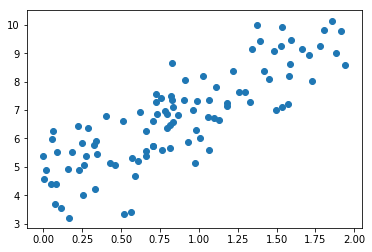

In [2]:
x = 2 * np.random.rand(100,1) # select a bunch of random features
y  = 4 + 3 * x + np.random.randn(100,1) # add randomness to model
plt.scatter(x.ravel(),y.ravel())

Its easy to compute $\hat{\theta}$. First we need to add in $x_0=1$

In [3]:
X_b = np.c_[np.ones((100,1)), x]

Now we use the closed form solution to approximate $\hat{\theta}$.

In [4]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.48622484],
       [2.59038371]])

Note that they should actually be 3 and 4. Now we can make predictions.

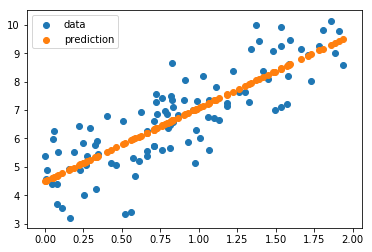

In [5]:
theta_best = theta_best.ravel()
y_predict = theta_best[0]+theta_best[1]*x
plt.scatter(x,y, label='data')
plt.scatter(x,y_predict,label='prediction')
plt.legend()
plt.show()

### Scikit Learn Method

In [6]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
lin_reg.intercept_, lin_reg.coef_

(array([4.48622484]), array([[2.59038371]]))

### Computational Complexity

Computing the inverse of $\mathbf{X}^T \mathbf{X}$ is typically about $O(n^{2.4})$ to $O(n^3)$ where $n$ *is the number of features*. Thus this algorithm is slow when the number of features gets very big. On the positive side, it is only linear with respect to the number of instances (training data points) so the algorithm is $O(m)$.

## Gradient Descent

*General Idea:* tweak parameters iteratively in order to minimize a cost function. For the linear model above, this can be accomplished by filling $\theta$ with random alus initially and then gradually take steps until the algorithm converges to a minimum.

**Learning Rate**: The size of the steps. Too low and it takes too long. Too high and you migh over jump the minima.

Main problem with gradient descent is that it can sometimes converge to a local minima and not a global minima (in the case of the linear regression above, global minima=local minima but this is not always the case).

*Important*: When using gradient descent with scikit learn its important that a standard scaler is used so that all features have a similar scale. Otherwise things will take too long to converge.

### Batch Gradient Descent

Its easy to show that

$$ \nabla_\theta \text{MSE}(\theta) = \frac{2}{m}\mathbf{X}^T \cdot (\mathbf{X} \cdot \theta - \mathbf{y})$$

When using batch gradient descent the steps are defined by

$$ \theta^{\text{(next step)}} = \theta-\eta\nabla_\theta \text{MSE}(\theta) $$

Note that this takes into account the entire training set.

In [8]:
eta1 = 0.1
eta2 = 0.02
eta3 = 0.5
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # start with random theta

def compute_thetas(theta, eta, n_iterations):
    thetas = []
    for iteration in range(n_iterations):
        gradient = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradient  
        thetas.append(theta)
    return np.array(thetas)

thetas_eta1 = compute_thetas(theta, eta1, n_iterations)
thetas_eta2 = compute_thetas(theta, eta2, n_iterations)
thetas_eta3 = compute_thetas(theta, eta3, n_iterations)

Visualization of how fast parameters converge.

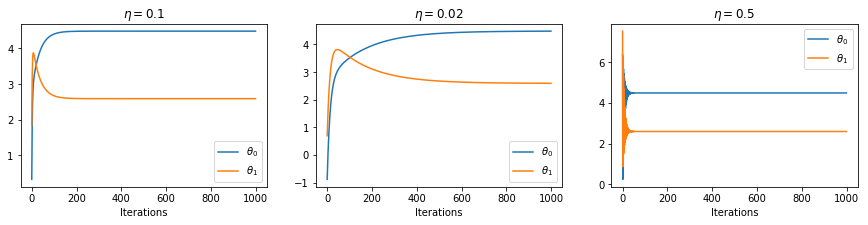

In [9]:
fig, ax = plt.subplots(1,3,figsize=(15,3))

ax[0].plot(thetas_eta1[:,0].ravel(), label=r'$\theta_0$')
ax[0].plot(thetas_eta1[:,1].ravel(), label=r'$\theta_1$')
ax[1].plot(thetas_eta2[:,0].ravel(), label=r'$\theta_0$')
ax[1].plot(thetas_eta2[:,1].ravel(), label=r'$\theta_1$')
ax[2].plot(thetas_eta3[:,0].ravel(), label=r'$\theta_0$')
ax[2].plot(thetas_eta3[:,1].ravel(), label=r'$\theta_1$')

ax[0].set_title('$\eta=0.1$')
ax[1].set_title('$\eta=0.02$')
ax[2].set_title('$\eta=0.5$')

[a.set_xlabel('Iterations') for a in ax.ravel()]
[a.legend() for a in ax.ravel()]
plt.show()

$\eta=0.1$ converges well, $\eta=0.02$ takes a little longer, and $\eta=0.5$ has trouble converging at first (lots of overshooting).

A good way to know when to stop doing more iterations (implemented in many machine learning packages) is to stop when the norm of the gradient vector becomes smaller than some value contained in the code $\epsilon$ known as the **tolerance**.

### Stochastic Gradient Descent

The problem with batch gradient descent is that it uses the entire training set at every iteration of $\theta$. At an opposite extreme, stochastic gradient descent picks a random instance in the training set at every iteration and uses that for computation.

Because this process is stochastic (random) the cost function bounces up and down, and will never quite converge to an optimal value of $\theta$. When the cost function is very irregular and has seperate local and global minima, this bouncing around nature can actually help jump out of local minima and find the true global minima.

Randomness: **Good** b/c helps escape local minima, **bad** because never quite settles on a minima.

The main solution to this is to reduce the learning rate gradually over time so that the algorithm can settle at a global minima. This process is called **simulated annealing**. (Isomorphic to annealing in metalurgy where molten metal is slowly colled down).

In [10]:
thetas= []
m = len(X_b)
np.random.seed(42)

n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        thetas.append(theta)  
        
thetas = np.array(thetas)

We iterate in rounds of $m$ iterations. Each round is called an **epoch**. For each epoch we do $m$ iterations. After each epoch we change the value of $\eta$.

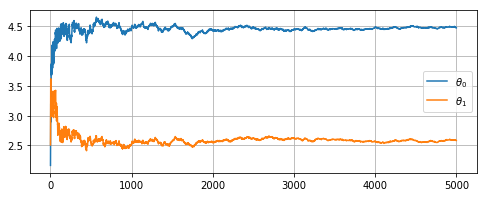

In [11]:
fig, ax = plt.subplots(1,1,figsize=(8,3))
ax.plot(thetas[:,0].ravel(), label=r'$\theta_0$')
ax.plot(thetas[:,1].ravel(), label=r'$\theta_1$')
ax.grid()
ax.legend()
plt.show()

### Mini-batch Gradient Descent


Mini-batch computes the gradients based on random sets of instances called **mini-batches**. The algorithms progress in parameter space is less erratic than SGD, but its harder for the algorithm to escape from local minima. 

For difference between batches and epochs see:

https://machinelearningmastery.com/difference-between-a-batch-and-an-epoch/

## Polynomial Regression

Surprsingy, a linear model can actaully be used to fit non-linear data. This involves adding powers of each feature as new features and then training the linear model on this extended set of features.

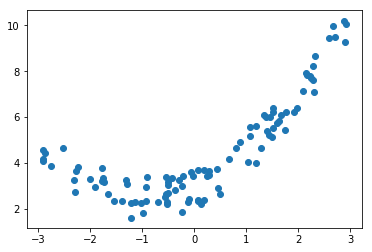

In [12]:
m = 100
X = 6 * np.random.rand(m,1) - 3 # normally distributed between -3 and 3
y = 0.5 * X**2 + X + 2 + 2*np.random.rand(m,1)
plt.scatter(X,y)

Now we use scikit learns PolynomialFeatures to add all possible polynomial features as the new data set. This now contains $x_1$, $x_2$, $x_1x_2$, $x_1^2$, $x_2^2$

In [13]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [17]:
X_poly[0]

array([-2.53415534,  6.42194331])

In [14]:
print(X_poly[0:3])

[[-2.53415534  6.42194331]
 [ 1.97322766  3.89362739]
 [-0.90665955  0.82203154]]


Note that X_poly now contains the linear and quadratic term. Now we can apply a fit

In [15]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.04823104]), array([[0.97461924, 0.50515305]]))

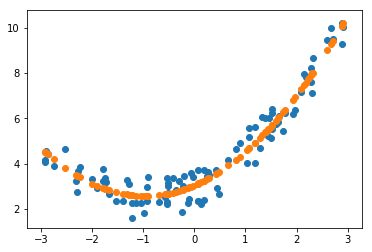

In [16]:
plt.scatter(X,y, label='Data')
plt.scatter(X, lin_reg.predict(X_poly).ravel(), label='Prediction')

Note that Polynomial Features doew neat things for multiple features: if we had features $X_1$ and $X_2$ and we specified degree=3, we would also get $X_1X_2^2$ and $X_2X_1^2$ (combinations of features).

## Learning Curves

Of course its also possible to overfit the data. Suppose we use a much higher order polynomial.

In [17]:
poly_bad_features = PolynomialFeatures(degree=20, include_bias=False)
X_poly_bad = poly_bad_features.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly_bad, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
x = np.arange(-3,3,0.01); x = np.reshape(x, (-1, 1))
x_r = poly_bad_features.fit_transform(x)

(0, 10)

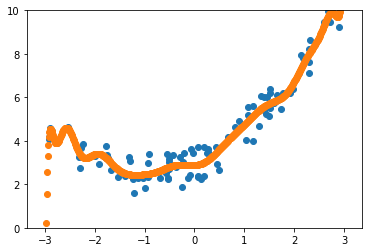

In [19]:
plt.scatter(X,y)
plt.scatter(x.ravel(), lin_reg.predict(x_r).ravel())
plt.ylim(0,10)

Now it appears to be overfitting the noise.

**In general, how can you tell if a model is overfitting or underfitting data**? If a model performs well on a training set but generalizes poorly according to cross-validation, then the model is overfitting. If it performs poorly on both, then it is underfitting. Another way is to look at **learning curves**. These are plots of the model's performance on a validation set using a test set of varying sizes. To generate these plots one simply needs to train a model several times on different sized subsets.

In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), 'r-+', lw=2, label='Train')
    plt.plot(np.sqrt(val_errors), 'b-', lw=3, label='Validation')
        

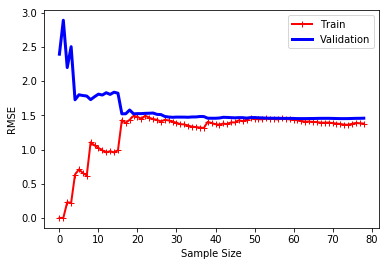

In [21]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.xlabel('Sample Size')
plt.ylabel('RMSE')
plt.legend()

When there are just 1 or 2 instances in the training set, the model can fit the data perfectly; this is why the RMSE starts at zero. But as new instances are created, the model can not fit all data perfectly (errors when drawing line through 3 points). For the validation set, when the sample size in the training set is small, the model is incapable of generalizing to many instances. Recall that we are training a linear model on a quadratic curve; this is why the RMSE eventually plateaus to a relatively high value.

Now lets train a 10th degree polynomial on the training set.

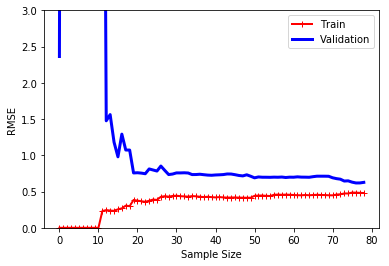

In [22]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([  
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
])

plot_learning_curves(polynomial_regression, X, y)
plt.xlabel('Sample Size')
plt.ylabel('RMSE')
plt.ylim(0,3)
plt.legend()

Note that there is a gap between the curves; this means that the model performs significantly better on the training data vs the the validation data, which is a hallmark of overfitting a model.

# Regularized Linear Models

Best way to reduce overfitting is to regularize the model (reduce DOF). For a linear model, best way to regularize is to *constrain the weights of the model*. There are three commonly used ways to do this: **Ridge Regression, Lasso Regression**, and **Elastic Net**.

## Ridge Regression

The term  $\alpha \sum_{i=1}^n \theta_i^2 $ is added to the cost function such that

$$J(\theta) = \text{MSE}(\theta) + \alpha \frac{1}{2}\sum_{i=1}^n \theta_i^2 $$

 This forces the learning algorithm to keep all the model weights as small as possible. $\alpha$ controls the extent to which this is done. Note that the bias term $\theta_0$ is not included here. The final term is the $l_2$ norm of the weight ($\theta$) vector. For a linear model, we can compute a closed form solution:
 
$$\hat{\theta} = (\mathbf{X}^T \cdot \mathbf{X}+\alpha \mathbf{A})^{-1} \cdot \mathbf{X}^T \cdot \mathbf{y} $$

where $\mathbf{A}$ is the identity matrix except for a 0 in the top left entry.

Ridge regression can be performed using **(i) the closed form solution:**

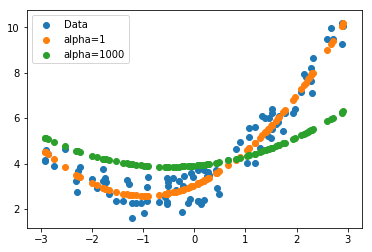

In [23]:
from sklearn.linear_model import Ridge
ridge_reg1 = Ridge(alpha=1, solver='cholesky')
ridge_reg1.fit(X_poly,y)

ridge_reg2 = Ridge(alpha=1000, solver='cholesky')
ridge_reg2.fit(X_poly,y)

#Plot
plt.figure(1)
plt.scatter(X.ravel(), y, label='Data')
plt.scatter(X.ravel(), ridge_reg1.predict(X_poly).ravel(), label='alpha=1')
plt.scatter(X.ravel(), ridge_reg2.predict(X_poly).ravel(), label='alpha=1000')
plt.legend()
plt.show()

or **(ii) Stochastic Gradient Descent:**

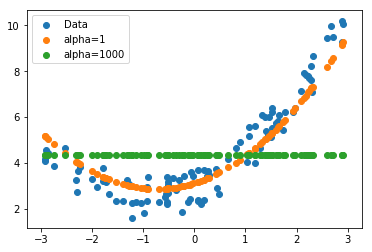

In [24]:
from sklearn.linear_model import SGDRegressor
sgd_reg1 = SGDRegressor(penalty='l2', alpha=1)
sgd_reg1.fit(X_poly, y.ravel())

sgd_reg2 = SGDRegressor(penalty='l2', alpha=1000)
sgd_reg2.fit(X_poly, y.ravel())

#Plot
plt.figure(1)
plt.scatter(X.ravel(), y, label='Data')
plt.scatter(X.ravel(), sgd_reg1.predict(X_poly).ravel(), label='alpha=1')
plt.scatter(X.ravel(), sgd_reg2.predict(X_poly).ravel(), label='alpha=1000')
plt.legend()
plt.show()

## Lasso Regression

Stands for *least absolute shrinkage and selection operator regression*. Changes the cost function to

$$J(\theta) = \text{MSE}(\theta) + \alpha \sum_{i=1}^n |\theta_i| $$

Lasso regression tends to completely eliminate the weights of the least important features (set the to zero)- see Figure 4-19. While this function is not differentiable at $\theta_i=0$, gradient descent still works if you use a subgradient vector $\mathbf{g}$ 

$$\mathbf{g} = \nabla_\theta \text{MSE}(\theta)+\alpha \cdot \text{sign}(\mathbf{\theta}) $$

where sign is just the sign of all the entries (-1, 0, or 1).

In [25]:
poly_features = PolynomialFeatures(degree=20, include_bias=False)
X_poly_high = poly_bad_features.fit_transform(X)

/Users/lukepolson/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25.544574283009563, tolerance: 0.04566109043215611
  positive)
/Users/lukepolson/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 74.03436583305287, tolerance: 0.04566109043215611
  positive)


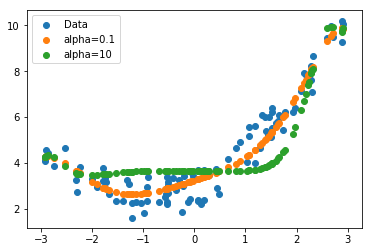

In [26]:
from sklearn.linear_model import Lasso
lasso_reg1 = Lasso(alpha=0.1)
lasso_reg2 = Lasso(alpha=10)
lasso_reg1.fit(X_poly_high, y.ravel())
lasso_reg2.fit(X_poly_high, y.ravel())

#Plot
plt.figure(1)
plt.scatter(X.ravel(), y, label='Data')
plt.scatter(X.ravel(), lasso_reg1.predict(X_poly_high).ravel(), label='alpha=0.1')
plt.scatter(X.ravel(), lasso_reg2.predict(X_poly_high).ravel(), label='alpha=10')
plt.legend()
plt.show()

## Elastic Net

Elastic net is middle ground between Ridge Regression and Lasso regression with mix ratio $0<r<1$.

$$J(\theta) = \text{MSE}(\theta)+r\alpha\sum_{i=1}^n |\theta_i| + \frac{1-r}{2}\alpha \sum_{i=1}^n \theta_i^2  $$

Elastic net is preferrend over Lasso since Lasso may behave erratically when *the number of features is greater than the number of training instances* **OR** *when several features are strongly correlated.*

/Users/lukepolson/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21.569861905487812, tolerance: 0.04566109043215611
  positive)


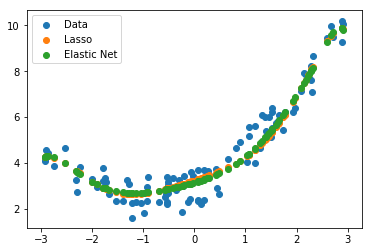

In [27]:
poly_features = PolynomialFeatures(degree=20, include_bias=False)
X_poly_high = poly_bad_features.fit_transform(X)

from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5) #l1_ratio=r
elastic_net.fit(X_poly_high, y.ravel())

#Plot
plt.figure(1)
plt.scatter(X.ravel(), y, label='Data')
plt.scatter(X.ravel(), lasso_reg1.predict(X_poly_high).ravel(), label='Lasso')
plt.scatter(X.ravel(), elastic_net.predict(X_poly_high).ravel(), label='Elastic Net')
plt.legend()
plt.show()

## Early Stopping

Differnt way to regularize iterative learning algorithms such as GDescent is to stop training as soon as validation error reaches a minimum.

In [28]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

Give polynomial features and scale for best performance.

In [29]:
from sklearn.preprocessing import StandardScaler

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

Use stochastic gradient descent over many iterations. For each epoch we only select one data point (max_iter=1) Since warm_start=True it keeps training over more and more of the loops.

In [30]:
%%capture

from sklearn.base import clone

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, penalty=None,
                      learning_rate='constant', eta0=0.0005)
minimum_val_error = float('inf')
best_epoch = None
train_errors = np.array([])
val_errors = np.array([])

for epoch in range(500):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    
    train_error = mean_squared_error(y_train, y_train_predict)
    val_error = mean_squared_error(y_val, y_val_predict)
    
    train_errors = np.append(train_errors, train_error)
    val_errors = np.append(val_errors, val_error)

Model does worse when you overfit with too much training.

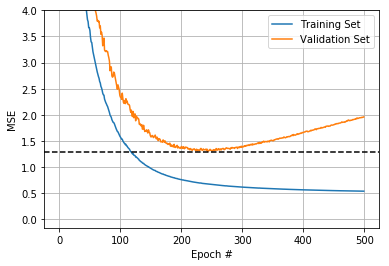

In [31]:
plt.plot(train_errors, label='Training Set')
plt.plot(val_errors, label='Validation Set')
plt.axhline(np.min(val_errors), color='k', ls='--')
plt.ylim(top=4)
plt.xlabel('Epoch #')
plt.ylabel('MSE')
plt.legend()
plt.grid()
plt.show()

# Logistic Regression

*Note: Logistic Regression is an option for the SGDClassifier of Scikit-Learn, which is specified by the argument "loss"*

Logistic regression is used for classification (what is probability that instance belongs to certain class). Logistic regression computes weighted sum of input features plus bias term, then outputs the **logistic** of the result

$$ \hat{p} = h_\theta (\mathbf{x}) = \sigma(\theta^T \cdot \mathbf{x})$$

where

$$ \sigma(t) = \frac{1}{1+e^{-t}} $$

The reason this funciton is used is simply of convenience: it is bounded between 0 and 1 and is monotonically increasing. Thus it is useful to relate to probabilities, such as our estimator $\hat{p}$.

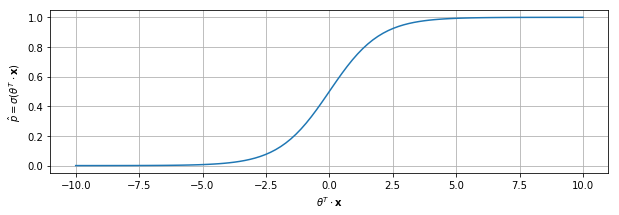

In [32]:
x = np.linspace(-10, 10, 100)
plt.figure(figsize=(10,3))
plt.plot(x, 1/(1+np.e**(-x)))
plt.xlabel(r'$\theta^T \cdot \mathbf{x}$')
plt.ylabel(r'$\hat{p} = \sigma(\theta^T \cdot \mathbf{x})$')
plt.grid()

Its bounded between zero and one. For binary classification, we have

$$\hat{y} = \begin{cases}
0 & \text{if} \hspace{3mm} \hat{p}<0.5\\
1 & \text{if} \hspace{3mm} \hat{p} \geq 0.5
\end{cases}$$

Thus we evalulate $\theta^T \cdot \mathbf{x}$ and see what where it lies on the graph. Note that $\theta^T \cdot \mathbf{x}>0$ says it belongs to one class, and  $\theta^T \cdot \mathbf{x}<0$ says it belongs to the other. But we don't only want to predict what class it belongs to, *we also want the probabilities to be high for classes we our sure of*. This is taken into account with the scaling of the vector $\theta^T$.

## Training and Cost Function

Goal is to set the parameter vector $\theta$ such that the model estimates high probabilities for positive instances and low probabilities for negative instances. Define the following cost function (which of course we want to minimize in the end)

$$c(\theta) = \begin{cases}
-\log(\hat{p}) & \text{if} \hspace{3mm} y=1\\
-\log(1-\hat{p}) & \text{if} \hspace{3mm} y=0\\
\end{cases}$$

this is for a single training instance. $-\log(t)$ grows large for $t=0$ so penalty for giving a probability close to zero for a positive instance is high. Over all we get

$$J(\theta) = -\frac{1}{m}\sum_{i=1}^m \left[y^{(i)}\log(\hat{p}^{(i)})+(1-y^{(i)})\log(1-\hat{p}^{(i)}) \right]$$

We want to choose $\theta$ such that that term is minimized. Then we can be given a new instance with parameters $\mathbf{x_0}$ and we can compute $\hat{p}_0 = \sigma(\theta^T \cdot \mathbf{x}_0)$ to find the probability of it being in a certain class.

There is no closed for solution to the equation, but since the cost function is **convex**, gradient descent is **guarenteed** to find the global minima. As before, the gradient descent path is given by the derivative:

$$\frac{\partial}{\partial \theta_j}J(\theta) = \frac{1}{m}\sum_{i=1}^m \left(\sigma(\theta^T \cdot \mathbf{x}^{(i)})-y^{(i)} \right)x_j^{(i)} $$

## Estimating Probabilities

Lets build a classifier to detect certain flowers based on the petal width feature.

In [33]:
from sklearn import datasets
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [34]:
X = iris['data'][:,3:] # petal width
y = (iris['target'] == 2).astype(int) # 1 if Iris-Virgincia else 0

Now we can train a logistic regression model

In [35]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver="liblinear", random_state=42)
log_reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Now we have certain predictions based on the pedal length. Now lets create a bunch of new instances with various pedal lengths and see what the predicted probabilities are.

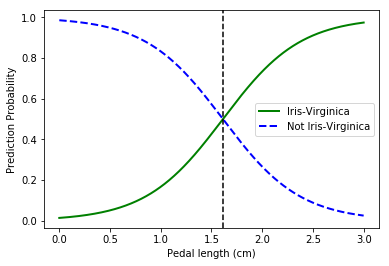

In [36]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.axvline(decision_boundary, color='k', ls='--')
plt.ylabel('Prediction Probability')
plt.xlabel('Pedal length (cm)')
plt.legend()
plt.show()

The dotted black line is the decision line to the right will be classified as an Iris-Virginica and anything to the left will be classified as not that. Even though the probabilities are small near the decision line (~0.5) the classifier will still classify them accordingly.

We can also train on more than one feature. This time lets look at petal width and length. Note that the correlation is very high for the flower type (see data table above). Here we set C high so the regularization strength is very small.

In [37]:
X = iris['data'][:,2::] # petal length and width
y = (iris['target'] == 2).astype(int) # 1 if Iris-Virgincia else 0

log_reg = LogisticRegression(solver="liblinear", C=10**10, random_state=42)
log_reg.fit(X,y)

LogisticRegression(C=10000000000, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

A few python tricks to create a meshgrid of length and width values and then convert to an appropriate way to feed into the log_reg.predict function.

In [38]:
x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_proba = log_reg.predict_proba(X_new)[:,1].reshape(x0.shape)

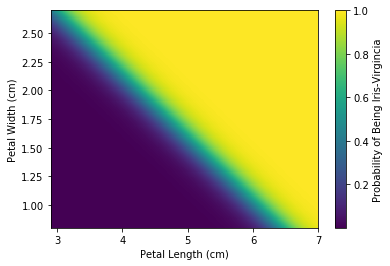

In [39]:
plt.pcolor(x0, x1, y_proba)
plt.colorbar(label='Probability of Being Iris-Virgincia')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.show()

# Softmax Regression

This is a generalization of logistic regression to the multiple classes case (no need to train multiple binary classifiers). This is also known as **multinomial logistic regression**.

Given some instance $\mathbf{x}$, works by computing a score $s_k(\mathbf{x})$ for each class $k$ then estimates the probability of each class by applying the **softmax function**. 

* Firstly the softmax function is computed. Each class has it sown parameter vector $\theta^{(k)}$.

$$s_k(\mathbf{x}) = (\theta^{(k)})^T \cdot \mathbf{x} $$

* Next the probability $\hat{p}_k$ is computed through the softmax function

$$\hat{p}_k = \sigma(s(\mathbf{x}))_k \equiv \frac{e^{s_k(\mathbf{x})}}{\sum_{j=1}^K e^{s_j(\mathbf{x})}} $$

* Just like Logistic Regression, softmax classifier predicts the class with the highest estimated probability

$$\hat{y} = \text{argmax}_k \sigma(s(\mathbf{x}))_k = \text{argmax}_k s_k(\mathbf{x}) = \text{argmax}_k (\theta^{(k)})^T \cdot \mathbf{x}  $$

Next we look at a cost function and its gradient

* The cost function below is often referred to as **cross entropy** is an appropriate cost function because it penalizes the model when it estimates a low probability for a target class ($\log(x)$ diverges for small $x$). Let $\Theta$ contain information about all $\theta_k$'s. This equation reduces to the previous one when $K=2$.

$$J(\Theta) = -\frac{1}{m}\sum_{i=1}^m \sum_{k=1}^K y_k^{(i)} \log(\hat{p}_k^{(i)})$$

* For each value of $\theta_k$ we have a seperate gradient, which we follow in order to compute the minina of $J(\Theta)$. The gradient is given by

$$\nabla_{\theta^{(k)}}J(\Theta)=\frac{1}{m}\sum_{i=1}^m (\hat{p}_k^{(i)}-y_k^{(i)})\mathbf{x}^{(i)} $$



In [40]:
X = iris['data'][:,2::]
y = iris['target'] # now include all 3 plants

Train the model

In [45]:
softmax_reg = LogisticRegression(multi_class="multinomial", solver='lbfgs', C=10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Make a mesh grid of trial values.

In [86]:
x0, x1 = np.meshgrid(
        np.linspace(0, 7, 500).reshape(-1, 1),
        np.linspace(0, 3, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_predict = softmax_reg.predict(X_new).reshape(x0.shape)
y_proba = softmax_reg.predict_proba(X_new)[:,1].reshape(x0.shape)

Note that y_predict either has 0's 1's or 2's, so we make a color map with 3 elements.

In [76]:
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

Plot.

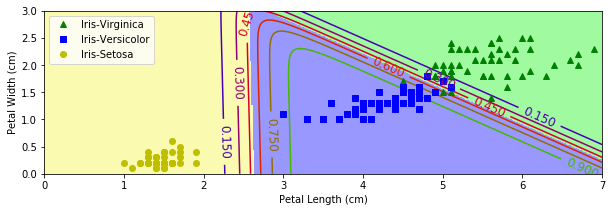

In [91]:
plt.figure(figsize=(10,3))
plt.contourf(x0, x1, y_predict, cmap=custom_cmap)
contour = plt.contour(x0, x1, y_proba, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()
plt.show()

This shows where the data is and what predictions the model will make.

# Exercises

## 1

Stochastic Gradient Descent would be ideal because then you don't have to train on million of features times millions of data points for each step (only millions of features). The normal equation cannot be used since the data set might not fit into memory.

## 2

If the features have different scales then the cost function has the shape of an elongated bowl (Think $\theta$ parameter space). This means the gradient descent takes longer to converge. In addtion, regularization terms will tend to ignore the smaller elements of $\theta$. Thus a StandardScaler should always be used.

## 3

The cost function for Logistic Regression is convex, so Gradient Descent cannot get stuck in a local minimum.

## 4

All gradient descent models **do not** lead to the same model provided you let them run long enough; some might get stuck in a local minimum. However, if the cost function is convex, and the learning rate isn't too high, then they should lead to the same model. Stochastic gradient descent models will jump back and forth around the optimum model because they are random in nature.

In other words, models are not, in general, time independent once $t$ reaches some large value $T>>1$.

## 5

If the training error consistently goes up during batch gradient descent, then it is likely that the learning rate is too high and the algorithm is diverging (gradient vector is too large so you go farther and farther away from the global minimum). This can also occur with the validation set, but if it only occurs for the validation set and not the training set, then this is **not** the problem, the model is simply overfitting the data.

## 6

It is not a good idea to stop gradient descent immediately when the validation error goes up. Since mini-batch gradient descent is random, there may be epochs where it chooses only outlier data, and the gradient points in an incorrect direction. A better option is is to wait until the model has not improved for a long time.

## 7

Stochastic Gradient Descent will converge the fastest since each batch only contains 1 instance of the training set (thus the gradient vector is computed many many times very quickly). Only batch gradient descent will converge (as long as the learning rate isn't too high) since the others are random in nature.

## 8

If the training error and the validation error have a large gap between them during Polynomial Regression, then the model is overfitting the data. Three potential ways to fix this are

- Add a regularization term ($l_1$ or $l_2$ norm)
- Decrease the order of the polynomial used
- Increase the size of the data set


## 9

If ridge regression is used and both the training and validation error are almost equal and fairly high then it is likely that the model is underfitting the data. This could be due to a large regularization term, so the regularization term should be decreased.

## 10

- Ridge Regression instead of Linear Regression would be used to control hyperparameters due to large variance in a training set (since it has a regularization term).

- Lasso Regression would be used instead of Ridge Regression because it tends to do a better job eliminating the unimportant features.

- Elastic net is preferrend over Lasso since Lasso may behave erratically when *the number of features is greater than the number of training instances* **OR** *when several features are strongly correlated.*

## 11

Since the features are not mutually exclusive, two Logistic Regression clasifiers should be used.